In [4]:
import numpy as np
import time
from sklearn.mixture import GaussianMixture
import sys
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# import autoscale_ogm as asogm
import sys
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import dbscan

In [3]:


#import GMSDB as gmsdb


from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs
import matplotlib.pyplot as pp
 
NN=1000
r=np.random.rand(NN)*10+50
r2=np.random.rand(NN)*10
r3=np.random.rand(NN)*10+80
phi=np.random.rand(NN)*6.28
phi2=np.random.rand(NN)*6.28
phi3=np.random.rand(NN)*6.28
X1=np.zeros((NN,2))
Y1=np.zeros(NN)
X1[:,0]=r*np.cos(phi)
X1[:,1]=r*np.sin(phi)
Y1[:]=1

X2=np.zeros((NN,2))
Y2=np.zeros(NN)
X2[:,0]=r2*np.cos(phi2)
X2[:,1]=r2*np.sin(phi2)
Y2[:]=0

X3=np.zeros((NN,2))
Y3=np.zeros(NN)
X3[:,0]=r3*np.cos(phi3)
X3[:,1]=r3*np.sin(phi3)
Y3[:]=0

X=np.concatenate([X1,X2,X3],axis=0)
Y=np.concatenate([Y1,Y2,Y3],axis=0)
idx=np.array(range(X.shape[0]))
np.random.shuffle(idx)
X=X[idx]
Y=Y[idx]

#pp.scatter(X[:,0],X[:,1])
#pp.show()
#quit()


Nn=300
Xn1=np.random.rand(Nn,1)*(X[:,0].max()-X[:,0].min())+X[:,0].min()
Xn2=np.random.rand(Nn,1)*(X[:,1].max()-X[:,1].min())+X[:,1].min()
Xn=np.concatenate([Xn1,Xn2],axis=1)
Yn=np.zeros(Nn)
Yn[:]=Y.max()+1
X=np.concatenate([X,Xn],axis=0)
Y=np.concatenate([Y,Yn],axis=0)


In [7]:
from sklearn.cluster import DBSCAN

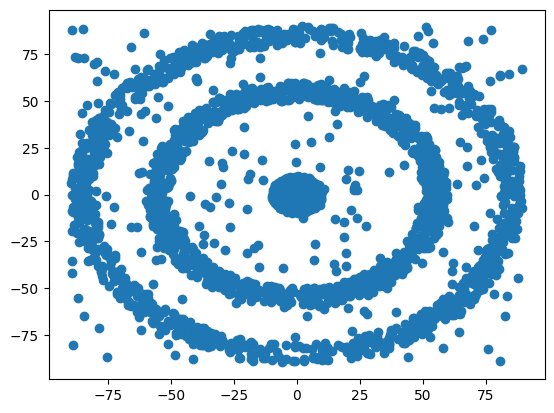

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

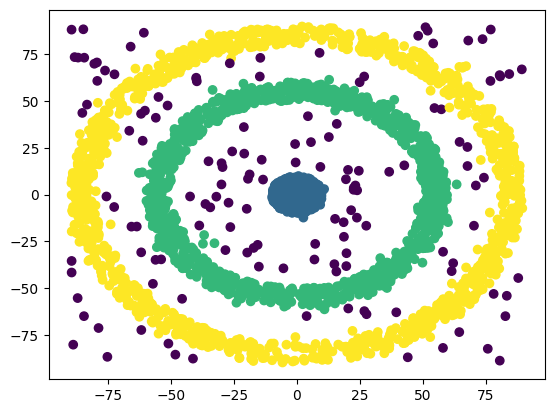

In [10]:
model = DBSCAN(5)
pred = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)